In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.set_option('max_rows', 20)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.family'] = 'sans-serif'

# 第 1 章：介紹及檢視資料集

資料分析的第一步，通常將透過工具取得的資料數據檔案給載入，並且先簡單的瀏覽一下數據，確認檔案是否有損毀、數據是否有錯誤、格式是否正確、數據是否合理⋯⋯等等。

接下來的課程將介紹我們在整個課程中使用的範例資料集，以及簡單地觀察資料。

## 範例資料集介紹：渦輪風扇發動機退化模擬數據集

這次為了讓各位熟悉分析工具，我們找了[Kaggle](https://www.kaggle.com/)(一個數據建模、數據分析競賽、數據分析教學平台)提供的**渦輪風扇發動機退化模擬數據集**，作為給各位練習的範例資料集。

由於資料集包含**名目 (Nominal) 尺度**以及**等距 (interval) 尺度**的資料，加上選擇設備數據，希望讓各位在處理資料的時候，可以實際體驗到資料分析工作可能會遇到的狀況並依此練習。

### 資料集簡介

* 主題：渦輪風扇發動機退化模擬數據集
* 資料來源：https://www.kaggle.com/c/predictive-maintenance/data?select=readme.txt
* Nasa Turbofan Dataset
* 資料收集頻率：100個渦輪扇發動機在相同工況從正常到劣化，每天多個感測器的數值變化
* 原始檔案中共有 32 個 columns，包含 1 column 為發動機編號，1 column 為工作時間，3 columns 的設定值，27個 columns 的感測器數值
* 監測時間說明：每天，但是沒有時間戳記，也沒有起訖時間

> [NOTE]：
>
> 這裡所使用的資料（turbofan.csv）已經經過整理，若要查看原始資料（train_PM.txt）經過哪些處理，請見 preprocessing_turbofan.ipynb


### 資料預覽


 發動機編號 | 工作時間 | 設定值1 | ... | 感測器1 | ...
--- | --- | --- | --- | --- | ---
0
0
0
...
100


### columns 說明

columns | 單位 | 說明
--- | --- | ---
unit_number | - |渦輪扇發動機設備編號
time_in_cycles | 天 | 工作時間
op_setting_1 | - | 設定值1
op_setting_2 | - | 設定值2
op_setting_3 | - | 設定值3
sensor_1 | - | 感測器數值1
sensor_2 | - | 感測器數值2
sensor_3 | - | 感測器數值3
sensor_4 | - | 感測器數值4
sensor_5 | - | 感測器數值5
sensor_6 | - | 感測器數值6
sensor_7 | - | 感測器數值7
sensor_8 | - | 感測器數值8
sensor_9 | - | 感測器數值9
sensor_10 | - | 感測器數值10
sensor_11 | - | 感測器數值11
sensor_12 | - | 感測器數值12
sensor_13 | - | 感測器數值13
sensor_14 | - | 感測器數值14
sensor_15 | - | 感測器數值15
sensor_16 | - | 感測器數值16
sensor_17 | - | 感測器數值17
sensor_18 | - | 感測器數值18
sensor_19 | - | 感測器數值19
sensor_20 | - | 感測器數值20
sensor_21 | - | 感測器數值21
sensor_22 | - | 感測器數值22
sensor_23 | - | 感測器數值23
sensor_24 | - | 感測器數值24
sensor_25 | - | 感測器數值25
sensor_26 | - | 感測器數值26
sensor_27 | - | 感測器數值27

## `read_csv()`：讀取 CSV 資料檔案

[CSV 檔案](https://zh.wikipedia.org/zh-tw/逗號分隔值)是一種常見的資料類型，比起 Microsoft Excel 或是其他試算表工具的專用格式，CSV 檔案顯得相當容易維護，且檔案容量相對其他格式顯得較小，在傳送時也相當方便，是我們相當推薦的格式。讀取時只要調用 `read_csv()` function 即可。

常用 Parameters : 

1. `filepath_or_buffer` : 路徑名稱
1. `parse_dates` : 將欲轉成  `datetime` 格式的 column 放入 list，預設為 `False`
1. `index_col` : 欲設定成 index 的 column，預設為 `None`

一般的試算表應用程式或是資料分析程式都有支援輸出資料檔案為 CSV 檔案的功能。如果還是有讀取 Excel 檔案的需求，也可以選擇調用 `read_excel()`（需要事先安裝 [`xlrd` 套件](https://pypi.org/project/xlrd/)）function 來完成。

讀取檔案時需要指定路徑及檔案名稱，這裡我們會利用 Python 內建的 `os` Library 裡的 function 來輔助。主要是可以避免在不同平台時可能會有路徑格式不同的問題，這時就建議使用 `os.path.join()` function 來標示完整路徑。

參考文件：

* [pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table)
* [pandas.read_excel()](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel-reader)
* [10 minutes to pandas | Getting Data In/Out](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#getting-data-in-out)
* [IO Tools (Text, CSV, HDF5, …)](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)
* [os.path.join](https://docs.python.org/3/library/os.path.html#os.path.join)

In [4]:
# 指定檔案位置，包含完整路徑以及檔案名稱
# os.curdir: 回傳目前目錄的路徑
# 若無法在個人電腦上以 Anaconda 開啟 Notebook，請用Google Colab開啟，並將下一行程式的註解消除，再將 turbofan.csv 資料上傳 
# Turbofan_FILEPATH = os.path.join(os.curdir, 'turbofan.csv')
Turbofan_FILEPATH = os.path.join(os.curdir, 'data', 'turbofan.csv')

# 檢視檔案位置
print(Turbofan_FILEPATH)

./data/turbofan.csv


## 讀入檔案

In [4]:
# 讀取 CSV 檔案，並將其指定為名稱是 df (DataFrame) 的物件
df = pd.read_csv(filepath_or_buffer=Turbofan_FILEPATH)
df_bak = df.copy()

# 使用 head() method 大略地瀏覽資料
df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388,100.0,38.49,22.9735,NaN,NaN,NaN,NaN,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388,100.0,38.30,23.1594,NaN,NaN,NaN,NaN,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388,100.0,38.44,22.9333,NaN,NaN,NaN,NaN,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388,100.0,38.29,23.0640,NaN,NaN,NaN,NaN,NaN,NaN
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,2388,100.0,38.37,23.0522,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(20631, 32)

In [7]:
# 使用內建的 type() function 來確認讀取後的物件類型
# https://docs.python.org/3/library/functions.html#type
type(df)

pandas.core.frame.DataFrame

In [8]:
# 檢視資料 DataFrame 的索引的物件類型
type(df.index)

pandas.core.indexes.range.RangeIndex

In [9]:
s = df['unit_number']
type(s)

pandas.core.series.Series

In [10]:
string = 'Hello World!'
type(string)

str

## 資料初探

### 名詞解釋：欄 (Column) 與列 (Row)

下表由縱向來看，`unit_number`, `time_in_cycles`, `op_setting_1`, `op_setting_2`, `op_setting_3` 則稱為排或是**欄 (Column)**，所以這個表格中總共有 4 個 Column。

而由橫向來看時，每一**列 (Row)** 為一筆資料。

unit_number | time_in_cycles | op_setting_1 | op_setting_2 | op_setting_3
--- | --- | --- | --- | ---
1 | 1 | 2.0 | 0.20 | 0.04
1 | 2 | 2.2 | 0.19 | 0.05
1 | 3 | 2.2 | 0.24 | 0.08


> [NOTE] 
>
> 若各位之後有機會閱讀中國大陸的文件，他們在稱呼欄與列時，與我們的方向是相反的。
> 
> 因為怕各位混淆，往後我們在觀察資料時，將直接標註為 Column 或 Row，不再使用中文稱呼。
>
> 也因為基於翻譯在不同的地區、作者可能會有不同的中文名詞，我們也會儘量使用原始的英文名詞來描述。

### 檢視特定欄位的資料

接著我們簡單示範一下如何觀察剛才載入的部分資料。

In [11]:
# 取得某一個 column 名稱的資料
# 舉例說明：取得 渦輪扇發動機設備編號（Column 名稱：'unit_number'）的資料
df['unit_number']

0          1
1          1
2          1
3          1
4          1
        ... 
20626    100
20627    100
20628    100
20629    100
20630    100
Name: unit_number, Length: 20631, dtype: int64

In [12]:
# 取得多個 columns 的資料
# 舉例說明：取得 渦輪扇發動機設備編號、工作週期、設定值1（Column 名稱：'unit_number', 'time_in_cycles', 'op_setting_1'）的資料
df[['unit_number', 'time_in_cycles', 'op_setting_1']].head()

,unit_number,time_in_cycles,op_setting_1
0,1,1,-0.0007
1,1,2,0.0019
2,1,3,-0.0043
3,1,4,0.0007
4,1,5,-0.0019


還有許多的方法可以瀏覽資料，我們將在之後的章節一一說明。

## 資料視覺化初探

將數值類型的資料畫成圖表，在檢視資料時也是相當好用的工具。

<AxesSubplot:>

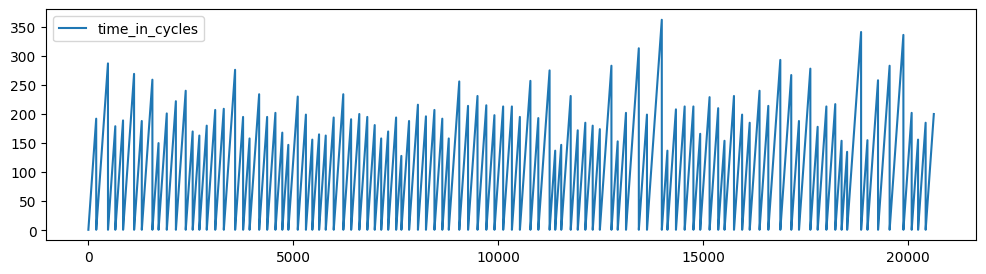

In [13]:
# 取得某一個 column 資料，利用 dataframe 的 methods plot() 將資料轉成圖表
# 舉例說明：取得 工作週期 （Column 名稱：'time_in_cycles'）的資料，並轉成折線圖表
df[['time_in_cycles']].plot()

除了**折線圖**以外，Pandas 還提供了不同的圖表類型可供選擇，之後的章節也會說明。